In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score, classification_report

In [25]:

# Load dataset
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

#  Data Preprocessing / Exploratory Data Analysis (EDA)

In [26]:
# Display the first few rows of the dataset
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [27]:
# Display basic information about the dataset
print("Basic Info:")
df.info()


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [28]:

# Summary statistics
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [29]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [30]:
# Drop unnecessary columns (e.g., ID, ZIP Code)
df = df.drop(['ID', 'ZIP Code'], axis=1)

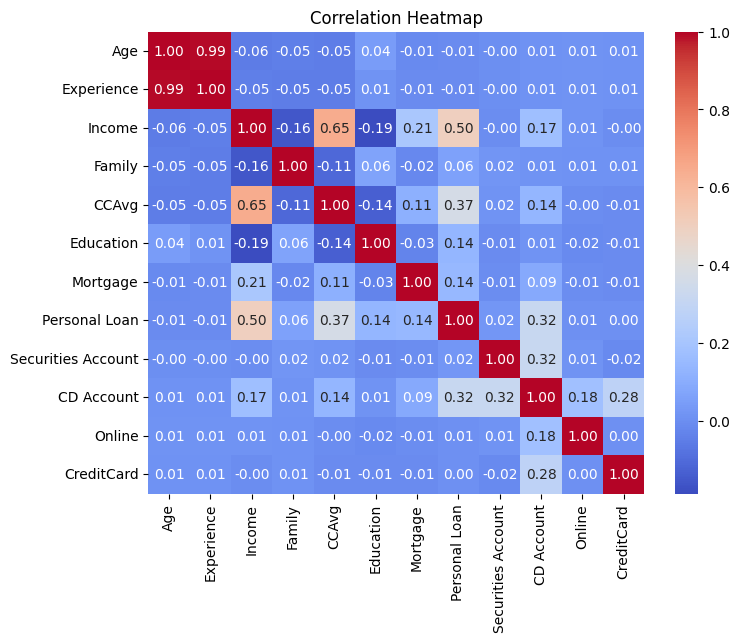

In [31]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


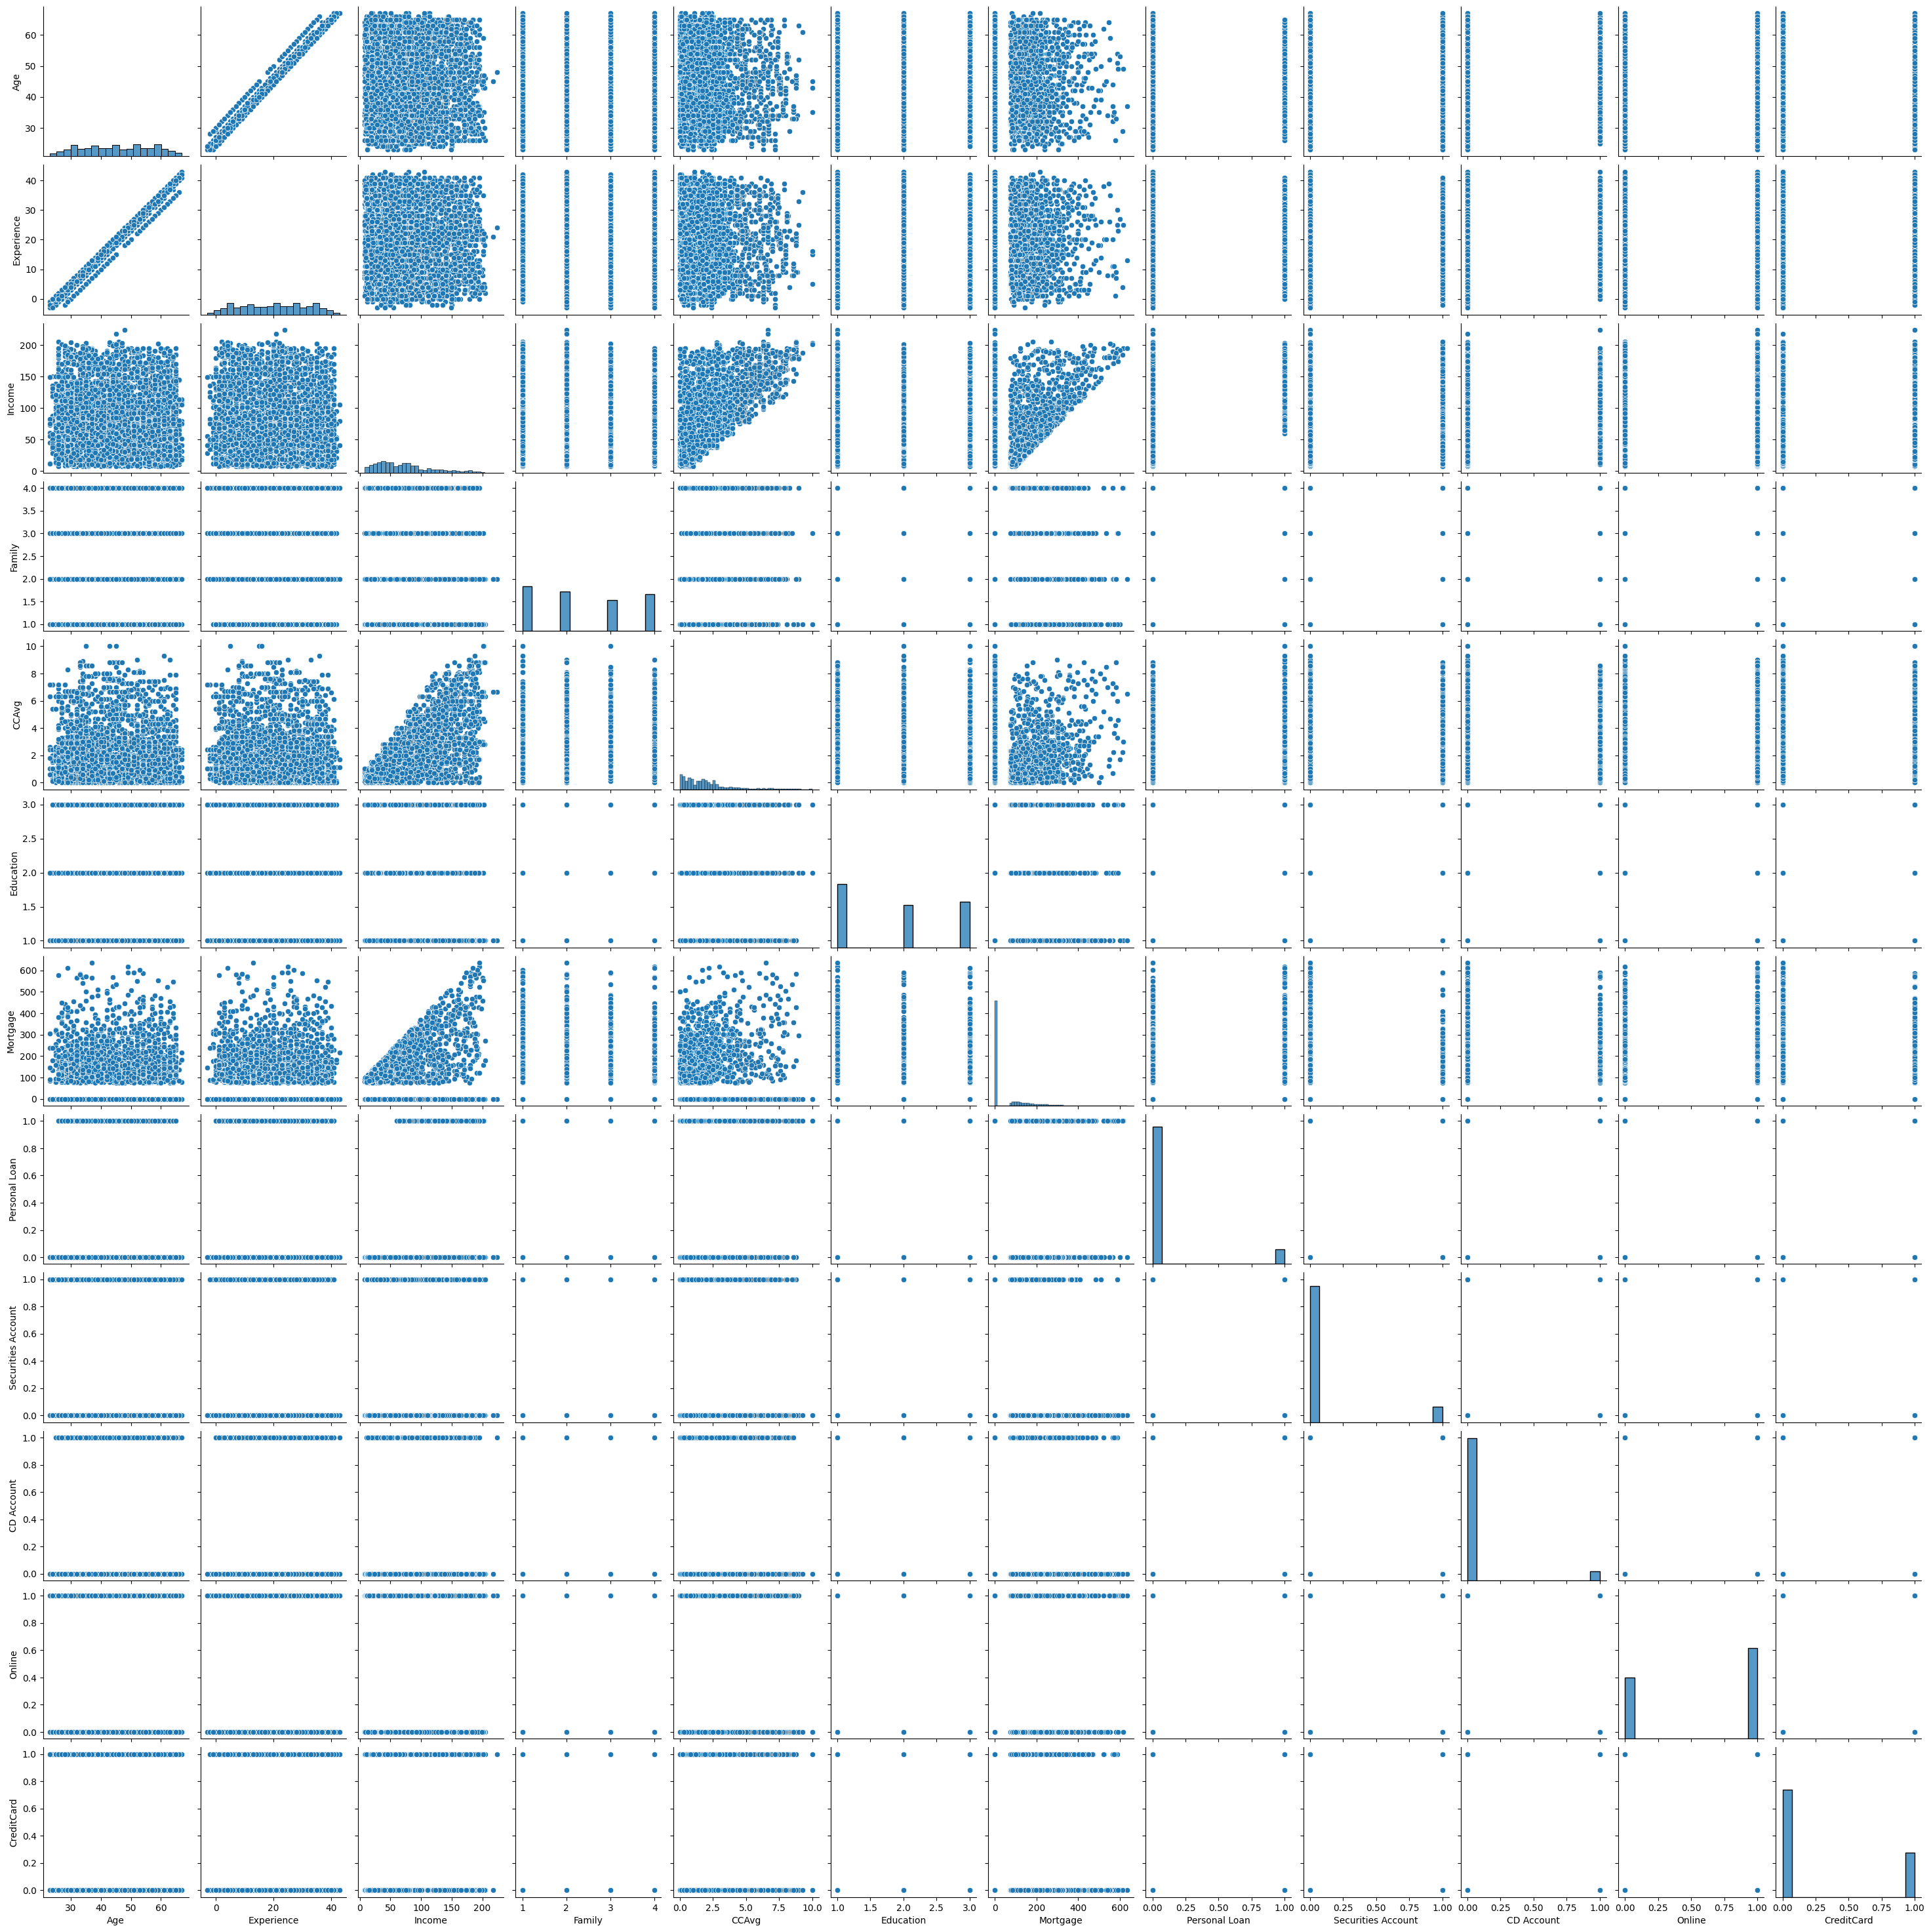

In [32]:

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [33]:

# Handle missing values
df.dropna(inplace=True)


In [34]:

# Encoding categorical variables if any
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


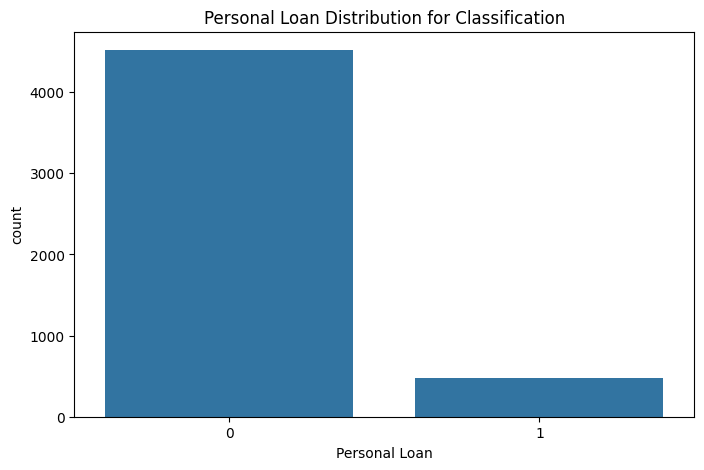

In [35]:
# Distribution of the target variable for classification
plt.figure(figsize=(8, 5))
sns.countplot(x='Personal Loan', data=df)
plt.title("Personal Loan Distribution for Classification")
plt.show()

In [36]:
# Count Personal Loan values 0
print((df['Personal Loan'] == 0).sum())

4520


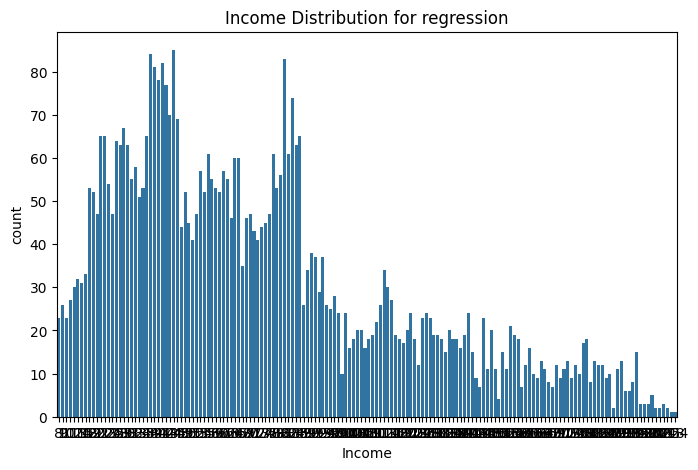

In [37]:
# Distribution of the target variable for regression
plt.figure(figsize=(8, 5))
sns.countplot(x='Income', data=df)
plt.title("Income Distribution for regression")
plt.show()

# Implement KNN

In [38]:

# Normalization
scaler = StandardScaler()
X = df.drop(['Personal Loan', 'Income'], axis=1)  # Features
y_classification = df['Personal Loan']  # Classification target
y_regression = df['Income']  # Regression target
X_scaled = scaler.fit_transform(X)


In [39]:

# Splitting data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)


In [40]:

# KNN Classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_c, y_train_c)
y_pred_c = knn_classifier.predict(X_test_c)

# Classification Metrics
print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))
print("Accuracy:", classification_report(y_test_c, y_pred_c))
print("Or:")
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall:", recall_score(y_test_c, y_pred_c))
print("F1-score:", f1_score(y_test_c, y_pred_c))


Classification Metrics:
Accuracy: 0.937
Confusion Matrix:
 [[890   5]
 [ 58  47]]
Accuracy:               precision    recall  f1-score   support

           0       0.94      0.99      0.97       895
           1       0.90      0.45      0.60       105

    accuracy                           0.94      1000
   macro avg       0.92      0.72      0.78      1000
weighted avg       0.94      0.94      0.93      1000

Or:
Precision: 0.9038461538461539
Recall: 0.44761904761904764
F1-score: 0.5987261146496815


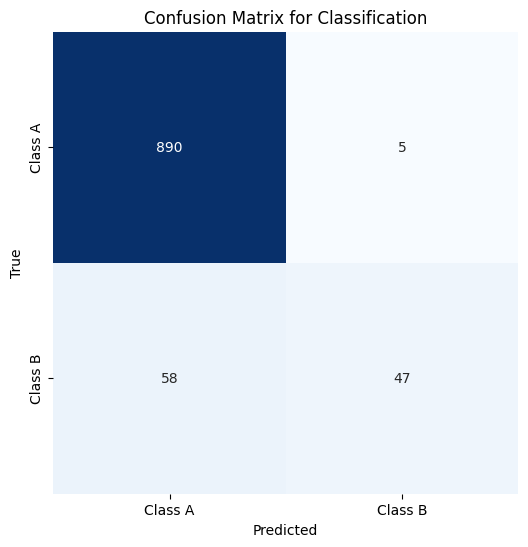

In [41]:

# Confusion Matrix for Classification (Optional)

conf_matrix = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class A', 'Class B'], yticklabels=['Class A', 'Class B'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classification')
plt.show()

In [42]:

# KNN Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_r, y_train_r)
y_pred_r = knn_regressor.predict(X_test_r)

# Regression Metrics
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_r)
print("\nRegression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



Regression Metrics:
MSE: 1090.8260400000001
RMSE: 33.0276556842898
R² Score: 0.4855858163651867


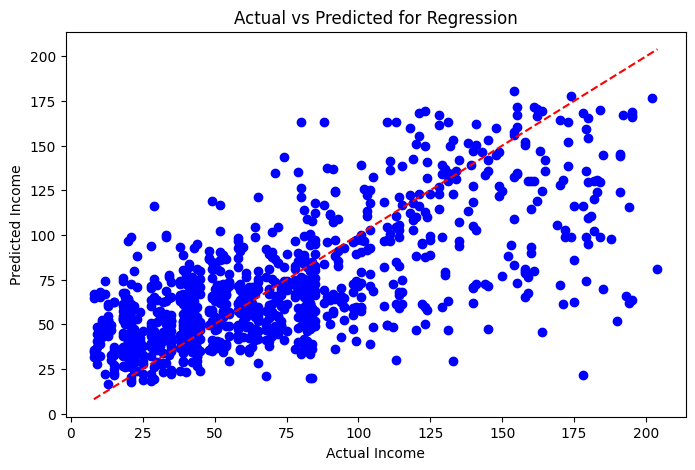

In [43]:
# Visualization: Actual vs Predicted for Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_r, color='blue')
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted for Regression')
plt.show()

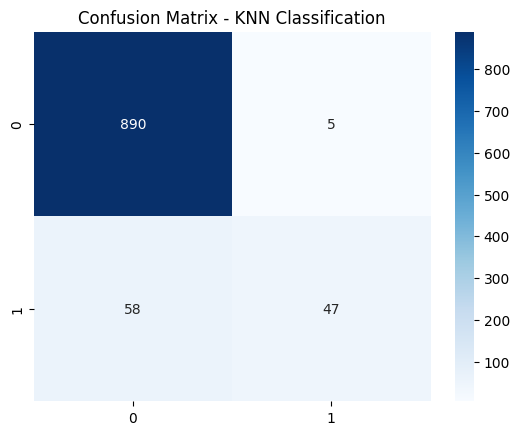

In [44]:

# Visualization
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Classification")
plt.show()


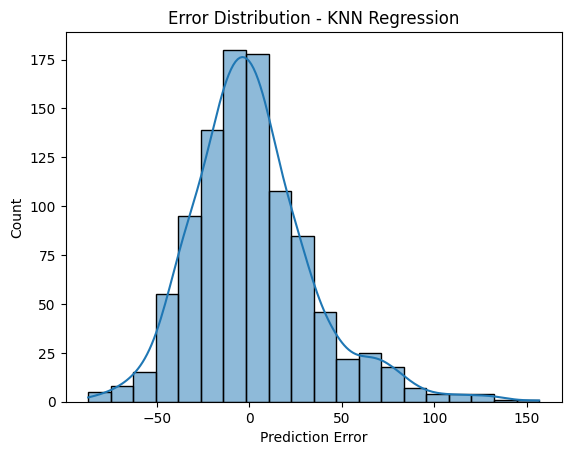

In [45]:

# Error Distribution
sns.histplot(y_test_r - y_pred_r, kde=True, bins=20)
plt.title("Error Distribution - KNN Regression")
plt.xlabel("Prediction Error")
plt.show()
